In [0]:
# Question 1
# Create a function that reverses a string. For example, given the string "forward", your function
# should return "drawof". Assume all inputs are strings

def reverse(string):
  string = string[::-1]
  return string

s = "forward"

print(reverse(s))

drawrof


In [0]:
# Question 2
# Complete the function below that can be used to calculate and return the posterior probability of
# an event A, given the known outcome of event B using Bayes Theorem:

def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """
    P(A | B) = [(b_given_not_a) * (a)] / (b)


In [3]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes(a, b_given_a, b_given_not_a):
	# calculate P(not A)
	not_a = 1 - a
	# calculate P(B)
	b = b_given_a * a + b_given_not_a * not_a
	# calculate P(A|B)
	a_given_b = (b_given_a * a) / b
	return a_given_b
 
# put in an example

# P(A)
a = 0.0002
# P(B|A)
b_given_a = 0.85
# P(B|not A)
b_given_not_a = 0.05
# calculate P(A|B)
result = bayes(a, b_given_a, b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


In [0]:
# Question 3
# Analyze the teams data set from the Lahman baseball records. This dataset contains season
# statistics for each Major League Baseball team.

# A. For all records since 1995, plot histograms for the following variables.
# Which distribution do they appear to follow, given their meaning?

!pip install seaborn==0.9.0

In [0]:
import pandas as pd
import seaborn as sns 
sns.set()

players_df = pd.read_csv("lahman-teams.csv")

In [0]:
players_df.head()

In [0]:
players_df.info()

In [0]:
null_rows = players_df[players_df.isnull().any(axis=1)]
null_rows.head()

In [0]:
null_rows.info()

In [0]:
zero_filled = null_rows.fillna(0.0)
zero_filled.head()

In [0]:
players_df_filtered = players_df[players_df["yearID"] > 1994] #filter the dataframe so that it shows only the data from year 1995 to 2015

In [0]:
players_df_filtered[['SB', 'W', 'ERA']].describe()

,SB,W,ERA
count,624.000000,624.000000,624.000000
mean,98.673077,80.560897,4.301603
std,31.800727,11.505856,0.554768
min,31.000000,43.000000,2.940000
25%,73.000000,72.000000,3.907500
50%,96.000000,80.000000,4.280000
75%,119.000000,90.000000,4.690000
max,201.000000,116.000000,6.380000


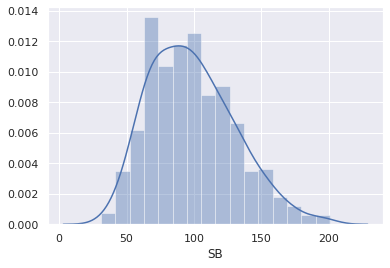

In [0]:
ax = sns.distplot(players_df_filtered['SB']) # This histogram seems to show Gamma Distribution

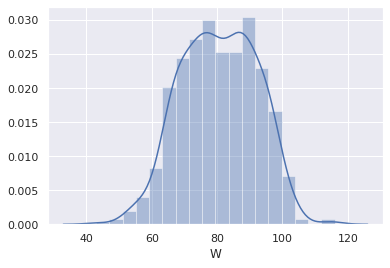

In [0]:
ax = sns.distplot(players_df_filtered['W']) # This histogram seems to show Binomial Distribution

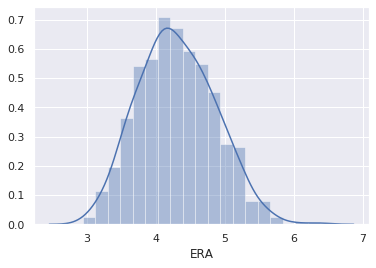

In [0]:
ax = sns.distplot(players_df_filtered['ERA']) # This histogram seems to show Conditional Distribution

In [0]:
# B. Conduct some further exploratory data analysis on this dataset.
# Consider qualities like distributions, correlations and trends over time.
# Try to find something interesting to say about the data, and use visualizations to support your argument.

# I've used 'attendance' as a variable between year 1990 and 2000

import pandas as pd
from scipy import stats

projects_df = pd.read_csv("lahman-teams.csv")


In [0]:
players_1990 = players_df.iloc[(players_df['yearID'] == 1990).values]
players_1990.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2047 to 2072
Data columns (total 48 columns):
yearID            26 non-null int64
lgID              26 non-null object
teamID            26 non-null object
franchID          26 non-null object
divID             26 non-null object
Rank              26 non-null int64
G                 26 non-null int64
Ghome             26 non-null float64
W                 26 non-null int64
L                 26 non-null int64
DivWin            26 non-null object
WCWin             0 non-null object
LgWin             26 non-null object
WSWin             26 non-null object
R                 26 non-null int64
AB                26 non-null int64
H                 26 non-null int64
2B                26 non-null int64
3B                26 non-null int64
HR                26 non-null int64
BB                26 non-null int64
SO                26 non-null float64
SB                26 non-null float64
CS                26 non-null float64
HBP          

In [0]:
players_2000 = players_df.iloc[(players_df['yearID'] == 2000).values]
players_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 2325 to 2354
Data columns (total 48 columns):
yearID            30 non-null int64
lgID              30 non-null object
teamID            30 non-null object
franchID          30 non-null object
divID             30 non-null object
Rank              30 non-null int64
G                 30 non-null int64
Ghome             30 non-null float64
W                 30 non-null int64
L                 30 non-null int64
DivWin            30 non-null object
WCWin             30 non-null object
LgWin             30 non-null object
WSWin             30 non-null object
R                 30 non-null int64
AB                30 non-null int64
H                 30 non-null int64
2B                30 non-null int64
3B                30 non-null int64
HR                30 non-null int64
BB                30 non-null int64
SO                30 non-null float64
SB                30 non-null float64
CS                30 non-null float64
HBP         

In [0]:
stats.ttest_ind(players_1990['attendance'], players_2000['attendance'])

Ttest_indResult(statistic=-1.4092074692982846, pvalue=0.16450674386032857)

In [0]:
# The p-value from the t-test shows it being extremely small, which shows a significant difference of attendance
# between year 1990 and 2000 (baseball attedance surely rose from 1990 to 2000)

In [0]:
# Question 4
# Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time.
# Plot the frequencies of the sample means. What distribution does this appear to follow?
# Hint: df['col'].sample(n = 50) will draw 50 random observations from df['col']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

players_df = pd.read_csv("lahman-teams.csv")

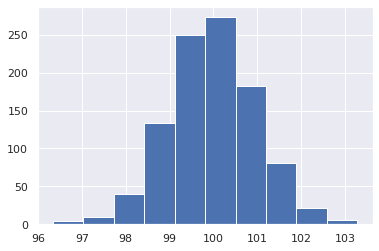

In [0]:
# Making a standard normally distributed variable with 1000 observations, a mean of 0, and 
# a standard deviation of 1, and putting it in a data frame.
mean = 100
sd = 1
n = 1000

# Create a DataFrame of one column ERA,
# containing random numbers following normal distribution

players_df['SB'] = pd.DataFrame({'SB': np.random.normal(mean, sd, n)})

# Plotting the variables in the data frame (here, just the variable "ERA") as a histogram.
players_df['SB'].hist()
# Inline printing the histogram
plt.show()